La plupart des techniques de regroupement traditionnelles, telles que les k-means, le regroupement hiérarchique et fuzzy, peuvent être utilisées pour regrouper des données sans supervision. 

Cependant, lorsqu'elles sont appliquées à des tâches avec des groupes de formes arbitraires, ou des groupes à l'intérieur d'un groupe, les techniques traditionnelles peuvent ne pas donner de bons résultats. En d'autres termes, les éléments d'une même cluster peuvent ne pas être suffisamment similaires ou les performances peuvent être médiocres.
En outre, DBSCAN est basé sur la densité permet de localiser les régions de haute densité qui sont séparées les unes des autres par des régions de faible densité. La densité, dans ce contexte, est définie comme le nombre de points dans un rayon donné.

In [1]:
# Avis : Pour la visualisation de la carte, vous avez besoin du package basemap.
# si vous n'avez pas basemap installé sur votre machine, vous pouvez utiliser la ligne suivante pour l'installer
# !conda install -c conda-forge basemap==1.1.0 matplotlib==2.2.2 -y
# Remarque : il se peut que vous deviez rafraîchir votre page et relancer le portable après l'installation

### Importation des Bibliothèques

In [2]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
%matplotlib inline

### Génération de données
La fonction ci-dessous génère les points de données et nécessite ces entrées :
<ul>
    <li> <b>centroidLocation</b> : Coordonnées des centroïdes qui vont générer les données aléatoires. </li>
    <ul> <li> Exemple : entrée : [[4,3], [2,-1], [-1,4]] </li> </ul>
    <li> <b>numSamples</b> : Le nombre de points de données que nous voulons générer, répartis sur le nombre de centroïdes (nombre de centroïdes définis dans centroidLocation) </li>
    <ul> <li> Exemple : 1500 </li> </ul>
    <li> <b>clusterDeviation</b> : L'écart type entre les clusters. Plus le nombre est grand, plus l'espacement est important. </li>
    <ul> <li> Exemple : 0,5 </li> </ul>
</ul>

In [4]:
def createDataPoints(centroidLocation, numSamples, clusterDeviation):
    X, y = make_blobs(n_samples=numSamples, centers=centroidLocation, 
                                cluster_std=clusterDeviation)
    # Normalisation et standarisation des données en supprimant la moyenne et mise à l'échelle de la variance des unités
    X = StandardScaler().fit_transform(X)
    return X, y

In [5]:
X, y = createDataPoints([[4,3], [2,-1], [-1,4]] , 1500, 0.5)

### Modélisation 

DBSCAN fonctionne sur la base de deux paramètres : Epsilon et les points minimums  
__Epsilon__ détermine un rayon spécifique qui, s'il comprend un nombre suffisant de points, est appelé zone dense.  
__minimumSamples__ détermine le nombre minimum de points de données que nous voulons dans une région pour définir un cluster.

In [8]:
epsilon = 0.3
minimumSamples = 7
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_ #Étiquettes de clusters pour chaque point de l'ensemble de données donné à ajuster. Les points abérrantes reçoivent l'étiquette -1.
labels

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

### Distinguer les valeurs aberrantes

Remplaçons tous les éléments par "Vrai" dans core_samples_mask qui sont dans le cluster, "Faux" si les points sont aberrants.

In [9]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)

In [11]:
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([ True,  True,  True, ...,  True,  True,  True])

In [12]:
# Le nombre des clusters 
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

3

In [13]:
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2}

### Data visualization

In [14]:
# Créer des coleurs pour les différents clusters.
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
colors

array([[0.61960784, 0.00392157, 0.25882353, 1.        ],
       [0.99346405, 0.74771242, 0.43529412, 1.        ],
       [0.74771242, 0.89803922, 0.62745098, 1.        ],
       [0.36862745, 0.30980392, 0.63529412, 1.        ]])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

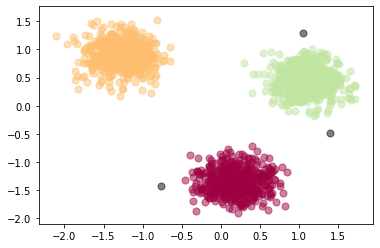

In [16]:
for k, col in zip(unique_labels, colors):
    if k == -1:
        # utiliser le coleur noir pour les points de bruit
        col = 'k'

    class_member_mask = (labels == k)
    
    # Visualisation des données qui sont regroupés en clusters 
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=col, marker=u'o', alpha=0.5)

    # Visualisation des outliers 
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=col, marker=u'o', alpha=0.5)

In [18]:
type(    class_member_mask)

numpy.ndarray

In [20]:
class_member_mask

array([False, False, False, ..., False, False, False])

In [21]:
core_samples_mask

array([ True,  True,  True, ...,  True,  True,  True])

In [22]:
## on va maintenant voir comment le partionnement est différent de la DBSCAN 
from sklearn.cluster import KMeans 
k = 3
k_means3 = KMeans(init = "k-means++", n_clusters = k, n_init = 12)
k_means3.fit(X)



KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=12, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


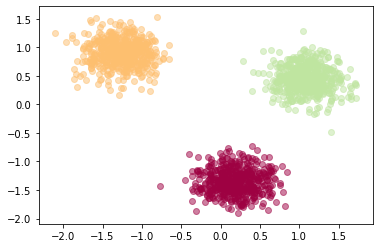

In [23]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(k), colors):
    my_members = (k_means3.labels_ == k)
    plt.scatter(X[my_members, 0], X[my_members, 1],  c=col, marker=u'o', alpha=0.5)
plt.show()
